In [4]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile

%matplotlib inline

In [ ]:
def rename_files(directory_path, prefix):
    # Define the directory path where your files are located
    directory_path = directory_path
    
    # Get a list of all files in the directory
    files = os.listdir(directory_path)
    
    # Loop through each file in the directory
    for filename in files:
        # Check if the item is a file (not a directory)
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Replace the word "tile" with the prefix of choice
            new_filename = filename.replace("tile", prefix)
    
            # Construct the full path to the original and new files
            old_filepath = os.path.join(directory_path, filename)
            new_filepath = os.path.join(directory_path, new_filename)
    
            # Rename the file
            os.rename(old_filepath, new_filepath)
    
    print("Files renamed successfully.")

In [ ]:
rename_files("../ALL_DATA", "Post")

In [1]:
!labelme2yolo --json_dir T:/EY_Challenge/EY_Challenge/ALL_DATA
!labelme2yolo --json_dir ./Annotated_Data

INFO:labelme2yolo:Converting train set ...

100%|██████████| 41/41 [00:03<00:00, 13.11it/s]
INFO:labelme2yolo:Converting val set ...

100%|██████████| 10/10 [00:00<00:00, 12.61it/s]
INFO:labelme2yolo:Converting test set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting train set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting val set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting test set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [5]:
#Loading the model
model = YOLO('yolov8n.pt')
# Display model information (optional)
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [6]:
# Train the model on the dataset for 50 epochs
results = model.train(data="../ALL_DATA/YOLODataset/dataset.yaml", epochs=150, imgsz=512)

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.13 🚀 Python-3.9.17 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=../ALL_DATA/YOLODataset/dataset.yaml, epochs=150, time=None, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

train: Scanning T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\train... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<00:00, 1095.15it/s]

train: New cache created: T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\train.cache



val: Scanning T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\val... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 670.43it/s]

val: New cache created: T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\val.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      1.59G      1.695      3.903      1.593        133        512: 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         10        155    0.00919       0.47     0.0511     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      1.75G      1.719      3.975       1.53        124        512: 100%|██████████| 3/3 [00:00<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.74it/s]

                   all         10        155    0.00738      0.392     0.0771     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      1.64G      1.554      3.876      1.533        110        512: 100%|██████████| 3/3 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.80it/s]

                   all         10        155    0.00924      0.428     0.0668       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      1.73G      1.492      3.798      1.436        217        512: 100%|██████████| 3/3 [00:00<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.52it/s]

                   all         10        155     0.0103      0.431      0.125     0.0791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      1.74G      1.344       3.57      1.291         94        512: 100%|██████████| 3/3 [00:00<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.24it/s]

                   all         10        155     0.0113      0.445      0.075     0.0368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      1.75G      1.459      3.429      1.272        198        512: 100%|██████████| 3/3 [00:00<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.75it/s]

                   all         10        155     0.0138      0.514     0.0862     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      1.59G      1.371      3.175       1.17        168        512: 100%|██████████| 3/3 [00:00<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.41it/s]

                   all         10        155     0.0138      0.511      0.107     0.0568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      1.73G      1.422      3.027      1.206        185        512: 100%|██████████| 3/3 [00:00<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.13it/s]

                   all         10        155     0.0139      0.511      0.115     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      1.78G      1.386      2.764      1.241        300        512: 100%|██████████| 3/3 [00:00<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.23it/s]

                   all         10        155      0.026      0.591      0.163     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      1.65G      1.541       2.48      1.242        219        512: 100%|██████████| 3/3 [00:00<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.85it/s]

                   all         10        155       0.03      0.629      0.203      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      1.73G      1.401      2.314      1.192        207        512: 100%|██████████| 3/3 [00:00<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.69it/s]

                   all         10        155      0.791     0.0505      0.214      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      1.72G      1.333      2.364      1.272        112        512: 100%|██████████| 3/3 [00:00<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.52it/s]

                   all         10        155      0.795     0.0606       0.22      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      1.74G      1.332      2.284      1.196        118        512: 100%|██████████| 3/3 [00:00<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all         10        155      0.491      0.108      0.322      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      1.75G      1.325      2.213      1.165        154        512: 100%|██████████| 3/3 [00:00<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.52it/s]

                   all         10        155      0.598      0.303      0.413      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      1.78G      1.495       2.06      1.221        314        512: 100%|██████████| 3/3 [00:00<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.60it/s]

                   all         10        155      0.362      0.423      0.396      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      1.66G       1.45      1.854      1.191        191        512: 100%|██████████| 3/3 [00:00<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.75it/s]

                   all         10        155      0.336      0.479      0.387      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      1.64G       1.33      1.841      1.193        184        512: 100%|██████████| 3/3 [00:00<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.62it/s]

                   all         10        155      0.368      0.476       0.39      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      1.78G      1.474      1.995      1.193        190        512: 100%|██████████| 3/3 [00:00<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.04it/s]

                   all         10        155      0.357      0.521      0.358      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      1.78G      1.427      1.926      1.195        150        512: 100%|██████████| 3/3 [00:00<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.97it/s]


                   all         10        155      0.385        0.5      0.349      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      1.65G      1.318      1.818      1.152        220        512: 100%|██████████| 3/3 [00:00<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.52it/s]

                   all         10        155      0.435      0.513       0.34      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      1.65G      1.256      1.818      1.164         96        512: 100%|██████████| 3/3 [00:00<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.53it/s]

                   all         10        155       0.39       0.52      0.335      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      1.75G      1.367      1.784      1.174        176        512: 100%|██████████| 3/3 [00:00<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.38it/s]

                   all         10        155      0.367      0.552      0.375      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      1.64G      1.418      1.789      1.199        238        512: 100%|██████████| 3/3 [00:00<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.50it/s]

                   all         10        155      0.366      0.533      0.389      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      1.65G       1.29      1.741      1.175        151        512: 100%|██████████| 3/3 [00:00<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.95it/s]

                   all         10        155      0.554      0.297      0.378      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      1.59G      1.327      1.747      1.176        252        512: 100%|██████████| 3/3 [00:00<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.32it/s]

                   all         10        155      0.584      0.297      0.389      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      1.58G      1.302       1.61      1.146        110        512: 100%|██████████| 3/3 [00:00<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.54it/s]

                   all         10        155      0.337      0.535      0.368       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      1.65G      1.301      1.578      1.184        138        512: 100%|██████████| 3/3 [00:00<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all         10        155      0.358      0.504      0.405      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      1.73G      1.352      1.485      1.196        118        512: 100%|██████████| 3/3 [00:00<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.36it/s]

                   all         10        155      0.515      0.429      0.429       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      1.63G      1.312      1.606      1.155        137        512: 100%|██████████| 3/3 [00:00<00:00, 13.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.53it/s]

                   all         10        155      0.515      0.429      0.429       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      1.76G      1.405      1.466       1.18        209        512: 100%|██████████| 3/3 [00:00<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.08it/s]

                   all         10        155        0.6      0.409      0.423      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      1.65G      1.334       1.62      1.178        146        512: 100%|██████████| 3/3 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.46it/s]

                   all         10        155      0.518      0.395      0.441       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      1.74G      1.307      1.405      1.161        151        512: 100%|██████████| 3/3 [00:00<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.35it/s]

                   all         10        155      0.623      0.322      0.392       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      1.73G      1.293        1.4       1.13        179        512: 100%|██████████| 3/3 [00:00<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.50it/s]

                   all         10        155      0.623      0.322      0.392       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      1.77G      1.294      1.377       1.11        184        512: 100%|██████████| 3/3 [00:00<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]

                   all         10        155      0.484      0.324      0.293      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      1.61G      1.295      1.379       1.13        195        512: 100%|██████████| 3/3 [00:00<00:00, 12.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.16it/s]

                   all         10        155      0.427       0.32      0.236      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      1.68G      1.372      1.516      1.167        293        512: 100%|██████████| 3/3 [00:00<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.54it/s]

                   all         10        155      0.319      0.259      0.232      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      1.65G      1.174      1.487       1.15        115        512: 100%|██████████| 3/3 [00:00<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.24it/s]

                   all         10        155      0.319      0.259      0.232      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      1.76G      1.351      1.342       1.15        303        512: 100%|██████████| 3/3 [00:00<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.39it/s]

                   all         10        155      0.629      0.288       0.34       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      1.78G      1.357      1.435      1.171        214        512: 100%|██████████| 3/3 [00:00<00:00, 12.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.56it/s]

                   all         10        155      0.627      0.279       0.37      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      1.74G      1.205      1.463      1.123        163        512: 100%|██████████| 3/3 [00:00<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.51it/s]

                   all         10        155      0.605      0.424      0.464      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      1.72G      1.221      1.467      1.126        109        512: 100%|██████████| 3/3 [00:00<00:00, 13.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.85it/s]

                   all         10        155      0.605      0.424      0.464      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      1.75G      1.303      1.396      1.141        208        512: 100%|██████████| 3/3 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.52it/s]

                   all         10        155      0.638       0.41      0.485      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      1.59G      1.297      1.319      1.111        237        512: 100%|██████████| 3/3 [00:00<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.10it/s]

                   all         10        155      0.663      0.451      0.481      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      1.65G      1.246      1.352      1.119        184        512: 100%|██████████| 3/3 [00:00<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.39it/s]

                   all         10        155       0.66      0.411      0.416      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      1.77G      1.273      1.393      1.129        200        512: 100%|██████████| 3/3 [00:00<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.80it/s]

                   all         10        155       0.66      0.411      0.416      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      1.76G      1.221      1.399      1.173         78        512: 100%|██████████| 3/3 [00:00<00:00, 12.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]

                   all         10        155      0.549      0.431      0.369      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      1.72G      1.294      1.449      1.206        299        512: 100%|██████████| 3/3 [00:00<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

                   all         10        155      0.482      0.439      0.356      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      1.65G      1.269       1.39      1.136        154        512: 100%|██████████| 3/3 [00:00<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.01it/s]

                   all         10        155      0.542      0.361      0.362      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      1.76G      1.309       1.35      1.124        161        512: 100%|██████████| 3/3 [00:00<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all         10        155      0.542      0.361      0.362      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      1.74G       1.31      1.304       1.14        168        512: 100%|██████████| 3/3 [00:00<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.86it/s]

                   all         10        155      0.463      0.409      0.363       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      1.72G      1.216      1.376      1.135        130        512: 100%|██████████| 3/3 [00:00<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.17it/s]

                   all         10        155      0.543      0.368      0.379      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      1.65G      1.221      1.351      1.128        140        512: 100%|██████████| 3/3 [00:00<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.20it/s]

                   all         10        155      0.434      0.438      0.361       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      1.76G       1.16      1.373      1.118        195        512: 100%|██████████| 3/3 [00:00<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.95it/s]

                   all         10        155      0.434      0.438      0.361       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      1.76G      1.264      1.316      1.121        109        512: 100%|██████████| 3/3 [00:00<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.65it/s]

                   all         10        155       0.38      0.435      0.321      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      1.76G      1.235      1.327      1.096        289        512: 100%|██████████| 3/3 [00:00<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.51it/s]

                   all         10        155      0.313      0.502      0.301      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      1.73G      1.184      1.292      1.091        155        512: 100%|██████████| 3/3 [00:00<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.81it/s]

                   all         10        155       0.31      0.534      0.316      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      1.65G      1.246      1.471      1.124        212        512: 100%|██████████| 3/3 [00:00<00:00, 13.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.53it/s]

                   all         10        155       0.31      0.534      0.316      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      1.76G      1.256      1.349      1.134        243        512: 100%|██████████| 3/3 [00:00<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.92it/s]

                   all         10        155      0.468      0.311      0.387      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      1.65G      1.111      1.179      1.076        159        512: 100%|██████████| 3/3 [00:00<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]

                   all         10        155      0.582      0.353      0.447      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      1.76G      1.224      1.206      1.097        190        512: 100%|██████████| 3/3 [00:00<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]

                   all         10        155      0.523      0.559      0.502      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      1.76G      1.292      1.229      1.124        137        512: 100%|██████████| 3/3 [00:00<00:00, 13.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.61it/s]

                   all         10        155      0.523      0.559      0.502      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      1.71G      1.226      1.218      1.113        200        512: 100%|██████████| 3/3 [00:00<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.09it/s]

                   all         10        155      0.617      0.552      0.529      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      1.73G      1.137      1.173      1.091        122        512: 100%|██████████| 3/3 [00:00<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

                   all         10        155      0.615      0.549      0.555      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      1.65G       1.09      1.191      1.054        123        512: 100%|██████████| 3/3 [00:00<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.86it/s]

                   all         10        155      0.608      0.582       0.56      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      1.75G      1.188      1.199      1.079        194        512: 100%|██████████| 3/3 [00:00<00:00, 13.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.81it/s]

                   all         10        155      0.608      0.582       0.56      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      1.75G      1.221      1.161      1.091        215        512: 100%|██████████| 3/3 [00:00<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]

                   all         10        155      0.569      0.524      0.531      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150       1.7G      1.196      1.267      1.122         93        512: 100%|██████████| 3/3 [00:00<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.62it/s]

                   all         10        155      0.687      0.431      0.515      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      1.72G      1.185      1.131      1.111        173        512: 100%|██████████| 3/3 [00:00<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.80it/s]

                   all         10        155      0.671      0.435       0.51       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      1.73G      1.183      1.176      1.053        125        512: 100%|██████████| 3/3 [00:00<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.84it/s]

                   all         10        155      0.671      0.435       0.51       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      1.72G      1.174       1.11      1.081        225        512: 100%|██████████| 3/3 [00:00<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.32it/s]

                   all         10        155      0.802      0.411       0.53      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      1.72G      1.134      1.159      1.096        246        512: 100%|██████████| 3/3 [00:00<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]

                   all         10        155      0.711      0.463      0.525      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      1.72G       1.19      1.092      1.079        251        512: 100%|██████████| 3/3 [00:00<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.80it/s]

                   all         10        155      0.618       0.49      0.537        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      1.65G      1.197      1.139      1.122        138        512: 100%|██████████| 3/3 [00:00<00:00, 13.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]

                   all         10        155      0.618       0.49      0.537        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      1.73G      1.192      1.189        1.1        291        512: 100%|██████████| 3/3 [00:00<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.95it/s]

                   all         10        155      0.494      0.505      0.492      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      1.75G       1.18       1.18      1.083        217        512: 100%|██████████| 3/3 [00:00<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]

                   all         10        155      0.521      0.494      0.477      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      1.76G      1.171      1.088       1.08        194        512: 100%|██████████| 3/3 [00:00<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.26it/s]

                   all         10        155      0.498      0.497      0.455      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      1.78G      1.171      1.208      1.073        173        512: 100%|██████████| 3/3 [00:00<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.86it/s]

                   all         10        155      0.498      0.497      0.455      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      1.64G       1.12      1.157      1.076        253        512: 100%|██████████| 3/3 [00:00<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.24it/s]

                   all         10        155       0.59      0.461      0.465      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      1.73G      1.084      1.171      1.057        143        512: 100%|██████████| 3/3 [00:00<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.86it/s]

                   all         10        155      0.583      0.438       0.45      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      1.65G      1.067      1.101      1.063        136        512: 100%|██████████| 3/3 [00:00<00:00, 12.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.22it/s]

                   all         10        155      0.514      0.518      0.485       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      1.73G      1.114      1.113      1.081        183        512: 100%|██████████| 3/3 [00:00<00:00, 13.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.54it/s]

                   all         10        155      0.514      0.518      0.485       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      1.64G      1.177      1.049      1.065        277        512: 100%|██████████| 3/3 [00:00<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.86it/s]

                   all         10        155      0.611      0.482      0.509      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      1.65G      1.138      1.061      1.095        190        512: 100%|██████████| 3/3 [00:00<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.09it/s]

                   all         10        155      0.627      0.483      0.534      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      1.65G      1.098      1.128      1.049        144        512: 100%|██████████| 3/3 [00:00<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        155      0.577      0.498      0.528      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      1.75G      1.134      1.169      1.057        229        512: 100%|██████████| 3/3 [00:00<00:00, 13.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.88it/s]

                   all         10        155      0.577      0.498      0.528      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      1.59G      1.033      1.015       1.02        192        512: 100%|██████████| 3/3 [00:00<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.54it/s]

                   all         10        155      0.485      0.525      0.526      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      1.73G      1.049      1.008      1.033        161        512: 100%|██████████| 3/3 [00:00<00:00, 12.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.69it/s]

                   all         10        155      0.538      0.549      0.556      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      1.72G     0.9501      1.098      1.048        132        512: 100%|██████████| 3/3 [00:00<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

                   all         10        155       0.65      0.485      0.572      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      1.65G      1.053      1.063      1.076         86        512: 100%|██████████| 3/3 [00:00<00:00, 14.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all         10        155       0.65      0.485      0.572      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      1.72G      1.104      1.257      1.088        148        512: 100%|██████████| 3/3 [00:00<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.12it/s]

                   all         10        155      0.658      0.585      0.587      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      1.78G      1.036      1.059      1.029        137        512: 100%|██████████| 3/3 [00:00<00:00, 11.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.84it/s]

                   all         10        155      0.641      0.599      0.594      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      1.76G        1.1      1.074      1.034        310        512: 100%|██████████| 3/3 [00:00<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.29it/s]

                   all         10        155      0.608      0.602      0.597      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      1.78G      1.081       1.08      1.043        136        512: 100%|██████████| 3/3 [00:00<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.53it/s]

                   all         10        155      0.608      0.602      0.597      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      1.59G     0.9942      1.066      1.023        106        512: 100%|██████████| 3/3 [00:00<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.13it/s]

                   all         10        155      0.598      0.608      0.628      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      1.58G     0.9903      1.016      1.038        127        512: 100%|██████████| 3/3 [00:00<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]

                   all         10        155      0.617      0.612      0.617      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      1.73G      1.068      1.032      1.056        242        512: 100%|██████████| 3/3 [00:00<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.63it/s]

                   all         10        155      0.556      0.651      0.624      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      1.74G      1.014      1.012      1.019        121        512: 100%|██████████| 3/3 [00:00<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.54it/s]

                   all         10        155      0.556      0.651      0.624      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      1.75G      1.077     0.9422      1.049        142        512: 100%|██████████| 3/3 [00:00<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]

                   all         10        155      0.597      0.558       0.62      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      1.73G      1.029     0.9815      1.045        168        512: 100%|██████████| 3/3 [00:00<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.89it/s]

                   all         10        155      0.656      0.515      0.619      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      1.76G      1.088      1.014      1.044        213        512: 100%|██████████| 3/3 [00:00<00:00, 12.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.69it/s]

                   all         10        155      0.617      0.553      0.612      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      1.61G      1.078     0.9644      1.029        211        512: 100%|██████████| 3/3 [00:00<00:00, 13.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.94it/s]

                   all         10        155      0.617      0.553      0.612      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      1.74G      1.028      1.077      1.034        123        512: 100%|██████████| 3/3 [00:00<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.04it/s]

                   all         10        155      0.633       0.59      0.582       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      1.76G      1.013     0.9349      1.018        152        512: 100%|██████████| 3/3 [00:00<00:00, 12.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.60it/s]

                   all         10        155      0.615      0.567      0.574      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      1.75G      1.007     0.9865      1.017        122        512: 100%|██████████| 3/3 [00:00<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.26it/s]

                   all         10        155      0.612      0.578      0.549      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      1.65G     0.9442      1.015      1.022        175        512: 100%|██████████| 3/3 [00:00<00:00, 13.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

                   all         10        155      0.612      0.578      0.549      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      1.74G      1.094     0.9417      1.034        243        512: 100%|██████████| 3/3 [00:00<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.92it/s]

                   all         10        155      0.559      0.614      0.539      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      1.62G      1.026      1.046      1.036        140        512: 100%|██████████| 3/3 [00:00<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

                   all         10        155      0.607      0.627      0.541       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      1.65G      1.085      1.058      1.073        239        512: 100%|██████████| 3/3 [00:00<00:00, 12.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]

                   all         10        155      0.578      0.535      0.545      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      1.65G      1.007      1.064      1.038        257        512: 100%|██████████| 3/3 [00:00<00:00, 13.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]

                   all         10        155      0.578      0.535      0.545      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      1.64G      1.014     0.9572      1.026        132        512: 100%|██████████| 3/3 [00:00<00:00, 12.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all         10        155      0.572      0.508      0.496       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      1.65G      1.004      0.997      1.003        317        512: 100%|██████████| 3/3 [00:00<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.53it/s]

                   all         10        155      0.604      0.496      0.499      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      1.65G      1.009     0.9956      1.057        160        512: 100%|██████████| 3/3 [00:00<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]

                   all         10        155      0.602      0.473      0.496      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      1.61G       1.08     0.9313      1.015        217        512: 100%|██████████| 3/3 [00:00<00:00, 13.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.24it/s]

                   all         10        155      0.602      0.473      0.496      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      1.64G     0.9913     0.9145      1.017        124        512: 100%|██████████| 3/3 [00:00<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        155      0.536      0.496        0.5      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      1.72G     0.9887      0.954      1.021        148        512: 100%|██████████| 3/3 [00:00<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]

                   all         10        155      0.473      0.559      0.517      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      1.73G      1.031       1.11     0.9971        436        512: 100%|██████████| 3/3 [00:00<00:00, 12.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

                   all         10        155      0.622      0.415      0.509      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      1.58G      1.028      1.011      1.028        106        512: 100%|██████████| 3/3 [00:00<00:00, 13.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.79it/s]

                   all         10        155      0.622      0.415      0.509      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      1.74G      1.101       1.01      1.015        226        512: 100%|██████████| 3/3 [00:00<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.27it/s]

                   all         10        155      0.638      0.436      0.507      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      1.74G     0.9658     0.9444      1.014        187        512: 100%|██████████| 3/3 [00:00<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.64it/s]

                   all         10        155      0.599      0.479      0.507      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      1.61G      1.056     0.9748      1.033        174        512: 100%|██████████| 3/3 [00:00<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        155      0.591      0.467      0.484      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      1.77G     0.9994      0.904      1.017        186        512: 100%|██████████| 3/3 [00:00<00:00, 13.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.11it/s]

                   all         10        155      0.591      0.467      0.484      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      1.59G      1.061     0.9853      1.057        180        512: 100%|██████████| 3/3 [00:00<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]

                   all         10        155      0.598      0.463      0.497      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      1.73G     0.9571     0.8841      1.007        223        512: 100%|██████████| 3/3 [00:00<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.62it/s]

                   all         10        155      0.509      0.506      0.498       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      1.76G      1.026     0.8578      0.999        179        512: 100%|██████████| 3/3 [00:00<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.50it/s]

                   all         10        155      0.473       0.56      0.503      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      1.74G      1.004     0.9558      1.012        191        512: 100%|██████████| 3/3 [00:00<00:00, 14.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.16it/s]

                   all         10        155      0.473       0.56      0.503      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      1.73G      1.063     0.9431      1.047        164        512: 100%|██████████| 3/3 [00:00<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.09it/s]

                   all         10        155      0.546      0.577      0.511      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      1.73G     0.9822     0.9284      1.005        168        512: 100%|██████████| 3/3 [00:00<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.86it/s]

                   all         10        155      0.535      0.572      0.517      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      1.58G      1.048     0.9038      1.006        166        512: 100%|██████████| 3/3 [00:00<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all         10        155      0.527      0.568      0.508      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      1.76G     0.9813     0.8744      1.007        216        512: 100%|██████████| 3/3 [00:00<00:00, 14.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]

                   all         10        155      0.527      0.568      0.508      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      1.74G      1.018     0.8647     0.9904        165        512: 100%|██████████| 3/3 [00:00<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.69it/s]

                   all         10        155      0.519      0.554      0.505      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      1.72G      1.039     0.9124      1.029        247        512: 100%|██████████| 3/3 [00:00<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.00it/s]

                   all         10        155      0.521      0.547      0.499      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      1.64G     0.9614     0.8925      1.015        235        512: 100%|██████████| 3/3 [00:00<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]

                   all         10        155      0.558      0.534      0.494      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      1.74G      0.999     0.8585      1.047        141        512: 100%|██████████| 3/3 [00:00<00:00, 14.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]

                   all         10        155      0.558      0.534      0.494      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      1.71G     0.9631     0.9472     0.9923        265        512: 100%|██████████| 3/3 [00:00<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]

                   all         10        155      0.543       0.51      0.492      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      1.74G     0.8867     0.9208     0.9703        178        512: 100%|██████████| 3/3 [00:00<00:00, 12.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.62it/s]

                   all         10        155      0.542      0.504      0.495      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      1.74G      0.976     0.9211     0.9984        217        512: 100%|██████████| 3/3 [00:00<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]

                   all         10        155      0.525      0.515      0.498       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      1.76G     0.9127     0.8573     0.9849        215        512: 100%|██████████| 3/3 [00:00<00:00, 13.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.24it/s]

                   all         10        155      0.525      0.515      0.498       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      1.73G      0.931     0.8297     0.9902        151        512: 100%|██████████| 3/3 [00:00<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.09it/s]

                   all         10        155      0.531      0.522      0.502      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      1.77G     0.9797     0.8523     0.9891        207        512: 100%|██████████| 3/3 [00:00<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.20it/s]

                   all         10        155      0.518      0.527      0.502       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      1.74G     0.9056     0.8464     0.9931        185        512: 100%|██████████| 3/3 [00:00<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.12it/s]

                   all         10        155      0.511      0.516      0.509      0.277


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      1.72G     0.9913     0.9811      1.021        144        512: 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]

                   all         10        155      0.511      0.516      0.509      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      1.72G     0.9468      1.114       1.04         57        512: 100%|██████████| 3/3 [00:00<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.67it/s]

                   all         10        155       0.48      0.582      0.512      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      1.74G      1.017      0.945       1.01         90        512: 100%|██████████| 3/3 [00:00<00:00, 13.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all         10        155      0.465      0.621      0.515      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      1.72G      0.914       1.09      1.001        219        512: 100%|██████████| 3/3 [00:00<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.11it/s]

                   all         10        155      0.519      0.511      0.519      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      1.74G     0.9672     0.9694      1.011        121        512: 100%|██████████| 3/3 [00:00<00:00, 14.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.52it/s]

                   all         10        155      0.519      0.511      0.519      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      1.64G     0.8373      1.054     0.9769         54        512: 100%|██████████| 3/3 [00:00<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.88it/s]

                   all         10        155      0.588      0.512      0.523      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      1.74G     0.9944     0.9287      1.015        136        512: 100%|██████████| 3/3 [00:00<00:00, 13.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.54it/s]

                   all         10        155      0.676      0.497      0.533      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      1.73G     0.9753       0.91      1.018        150        512: 100%|██████████| 3/3 [00:00<00:00, 13.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.16it/s]

                   all         10        155      0.661      0.494      0.533      0.276
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 98, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



148 epochs completed in 0.025 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.1.13 🚀 Python-3.9.17 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]


                   all         10        155      0.509       0.69      0.621      0.385
damagedcommercialbuilding         10          6      0.443      0.799      0.731      0.533
undamagedcommercialbuilding         10         33       0.56      0.617      0.543      0.334
undamagedresidentialbuilding         10        116      0.523      0.655       0.59      0.288
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train


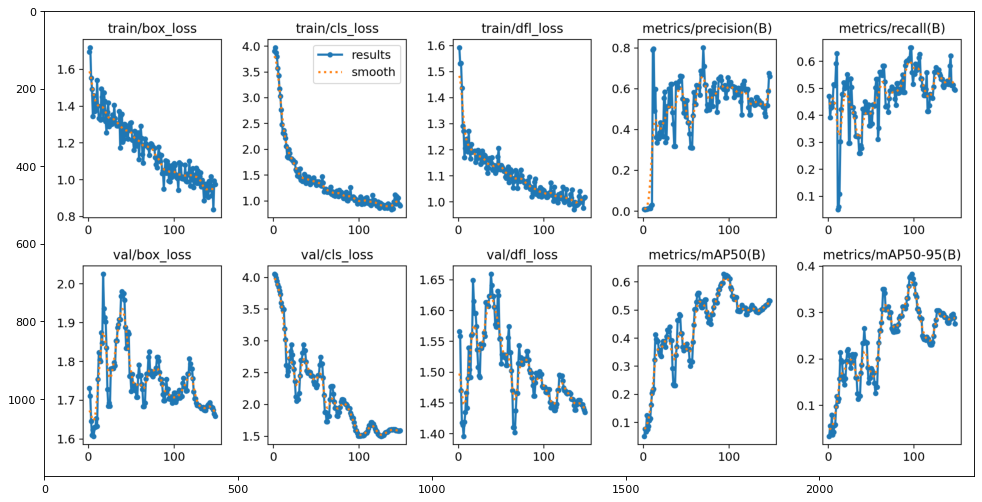

In [8]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread("../Rough Work/runs/detect/train/results.png")   
# displaying the image 
plt.imshow(results) 

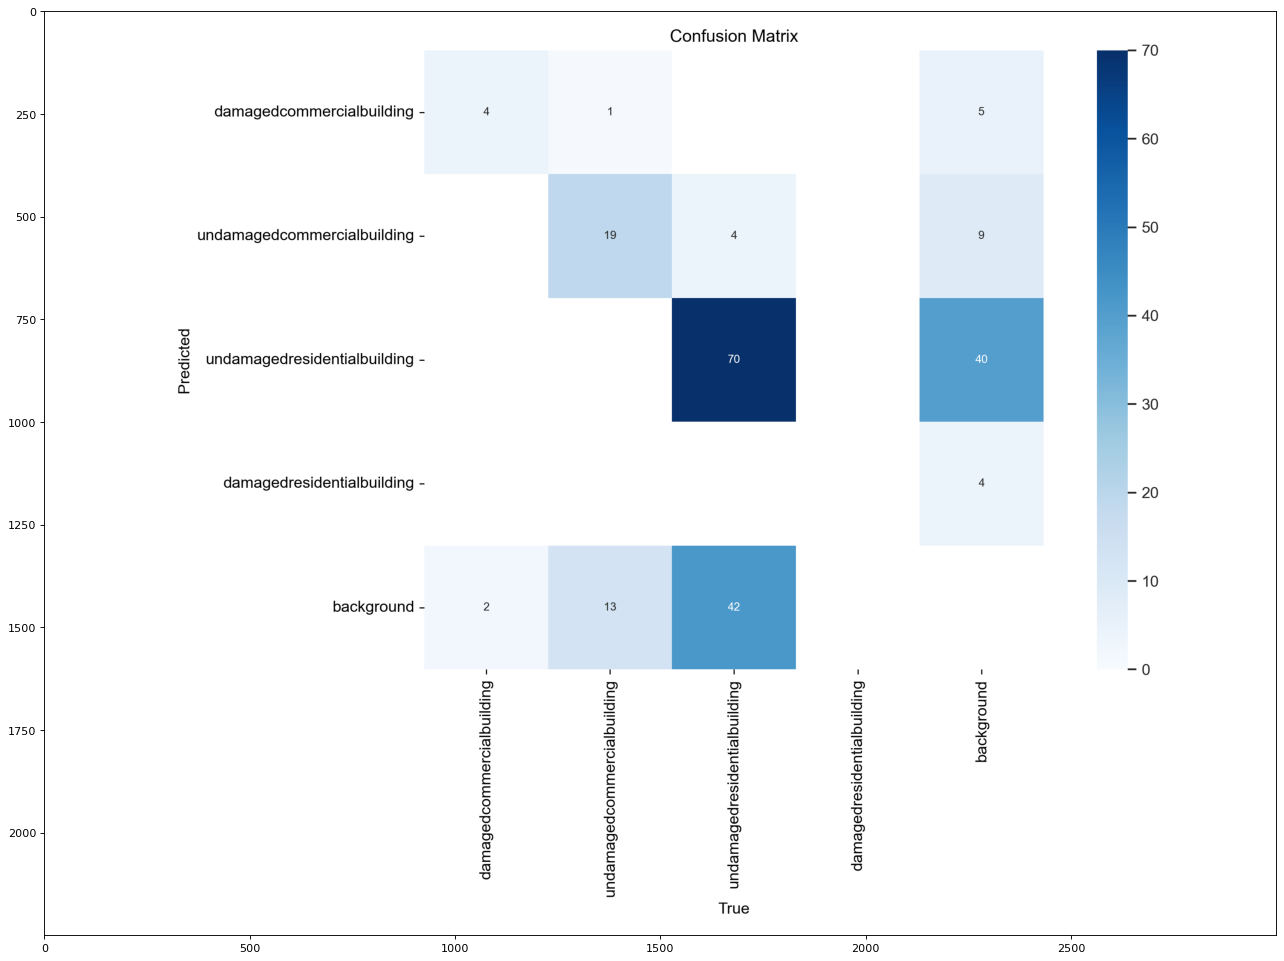

In [9]:
figure(figsize=(20,15), dpi=80)  
# reading the image 
cf = img.imread("../Rough Work/runs/detect/train/confusion_matrix.png") 
# displaying the image 
plt.imshow(cf) 

# Making Predictions

In [10]:
model = YOLO('runs/detect/train/weights/best.pt')

In [ ]:
print("Current working directory: ", os.getcwd())

In [11]:
def unzip_folder(zip_filepath, dest_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)
    print(f'The zip file {zip_filepath} has been extracted to the directory {dest_dir}')



submission_zip = './challenge_1_submission_images.zip'
submission_directory = './challenge_1_submission_images'
unzip_folder(submission_zip,submission_directory)

The zip file ./challenge_1_submission_images.zip has been extracted to the directory ./challenge_1_submission_images


In [15]:
# Decoding according to the .yaml file class names order
decoding_of_predictions ={1: 'undamagedcommercialbuilding', 2: 'undamagedresidentialbuilding', 3: 'damagedresidentialbuilding', 0: 'damagedcommercialbuilding'}

directory = './challenge_1_submission_images/Validation_Data_JPEG'
# Directory to store outputs
results_directory = 'Validation_Data_Results'

# Create submission directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the current object is a file and ends with .jpeg
    if os.path.isfile(os.path.join(directory, filename)) and filename.lower().endswith('.jpg'):
        # Perform operations on the file
        file_path = os.path.join(directory, filename)
        print(file_path)
        print("Making a prediction on ", filename)
        results = model.predict(file_path, save=True, iou=0.5, save_txt=True, conf=0.25)
        
        for r in results:
            conf_list = r.boxes.conf.cpu().numpy().tolist()  # Move tensor to CPU before converting
            clss_list = r.boxes.cls.cpu().numpy().tolist()  # Move tensor to CPU before converting
            original_list = clss_list
            updated_list = []
            for element in original_list:
                updated_list.append(decoding_of_predictions[int(element)])

        bounding_boxes = r.boxes.xyxy.cpu().numpy()  # Move tensor to CPU before converting
        confidences = conf_list
        class_names = updated_list


        # Check if bounding boxes, confidences and class names match
        if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
            print("Error: Number of bounding boxes, confidences, and class names should be the same.")
            continue
        text_file_name = os.path.splitext(filename)[0]
        # Creating a new .txt file for each image in the submission_directory
        with open(os.path.join(results_directory, f"{text_file_name}.txt"), "w") as file:
            for i in range(len(bounding_boxes)):
                # Get coordinates of each bounding box
                left, top, right, bottom = bounding_boxes[i]
                # Write content to file in desired format
                file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
        print("Output files generated successfully.")


./challenge_1_submission_images/Validation_Data_JPEG\Validation_Post_Event_001.jpg
Making a prediction on  Validation_Post_Event_001.jpg

image 1/1 t:\EY_Challenge\EY_Challenge\Rough Work\challenge_1_submission_images\Validation_Data_JPEG\Validation_Post_Event_001.jpg: 512x512 1 undamagedcommercialbuilding, 26 undamagedresidentialbuildings, 13 damagedresidentialbuildings, 7.0ms
Speed: 0.9ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels
Output files generated successfully.
./challenge_1_submission_images/Validation_Data_JPEG\Validation_Post_Event_002.jpg
Making a prediction on  Validation_Post_Event_002.jpg

image 1/1 t:\EY_Challenge\EY_Challenge\Rough Work\challenge_1_submission_images\Validation_Data_JPEG\Validation_Post_Event_002.jpg: 512x512 2 undamagedcommercialbuildings, 5 undamagedresidentialbuildings, 3 damagedresidentialbuildings, 8.0ms
Speed: 0.0ms preprocess, 

In [16]:
# Define your source directory and the destination where the zip file will be created
source_dir = results_directory
destination_zip = 'submission'

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', source_dir)

print(f"Directory {source_dir} has been successfully zipped into {destination_zip}.")

Directory Validation_Data_Results has been successfully zipped into submission.
